In [1]:
import pickle

from main2 import exp1
from utils.plotting import compare_training_histories, plot_training_history, compare_accuracies

# Experiment 1: Model Initialization
First of all, experiment with initializing your model weights in a few different ways. Create several MLPs with a single hidden layer having 128 units, initializing the weights as (1) all zeros (2) Uniform [-1, 1] (3) Gaussian N(0,1) (4) Xavier (5) Kaiming. After training these models, compare the effect of weight initialization on the training curves and test accuracy on the Fashion MNIST dataset.

Training with Zeros initialization...
Completed training with Zeros initialization. Final Train Accuracy: 0.1000, Final Test Accuracy: 0.1000

Training with Uniform initialization...
Completed training with Uniform initialization. Final Train Accuracy: 0.9111, Final Test Accuracy: 0.8815

Training with Gaussian initialization...
Completed training with Gaussian initialization. Final Train Accuracy: 0.9050, Final Test Accuracy: 0.8778

Training with Xavier initialization...
Completed training with Xavier initialization. Final Train Accuracy: 0.9144, Final Test Accuracy: 0.8810

Training with Kaiming initialization...
Completed training with Kaiming initialization. Final Train Accuracy: 0.9174, Final Test Accuracy: 0.8818



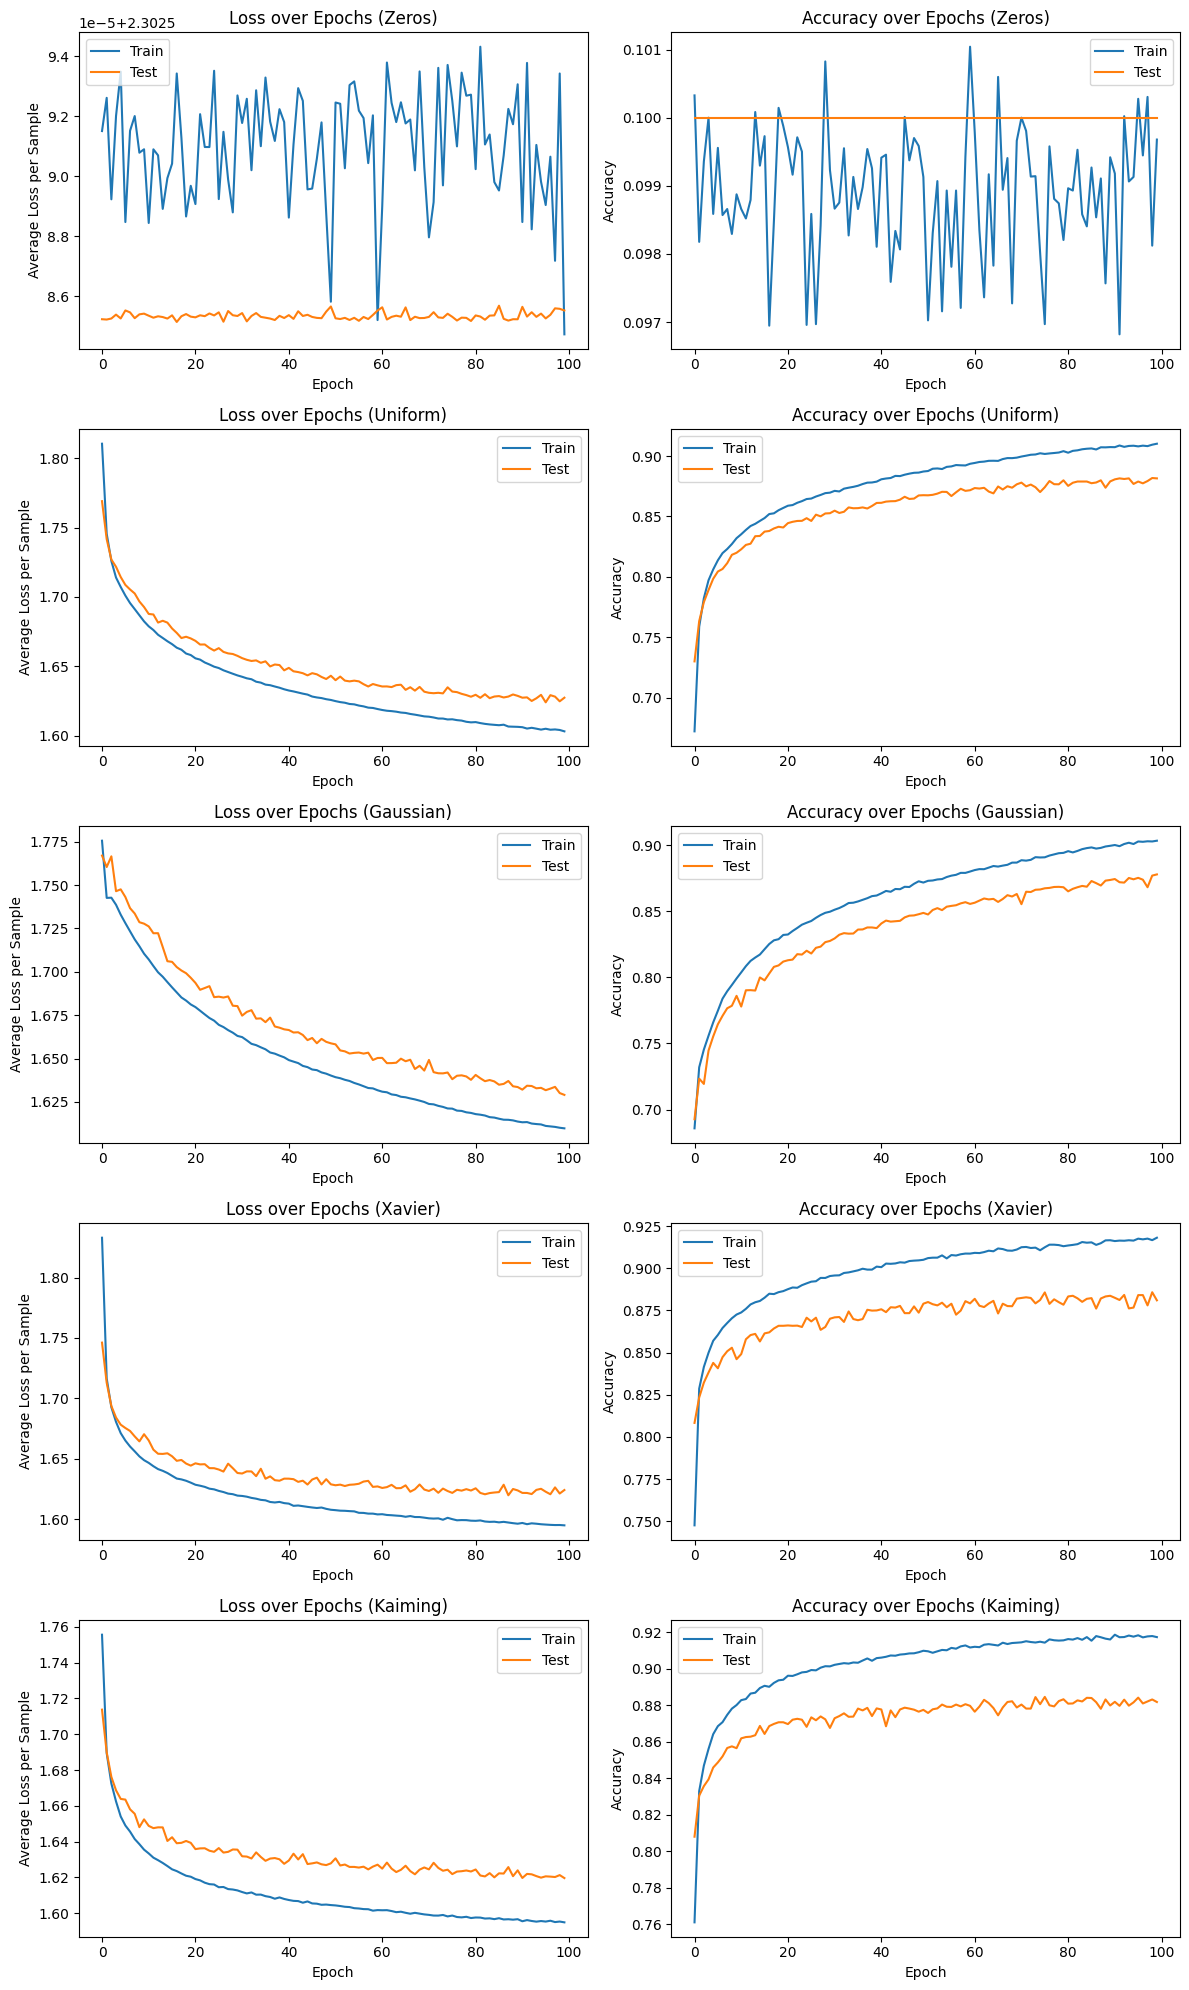

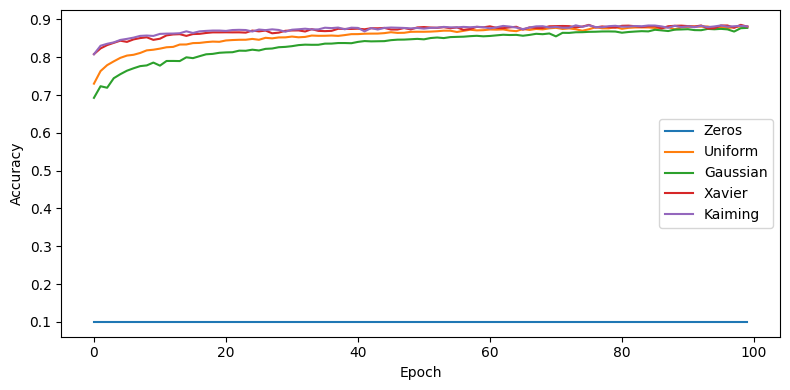

In [2]:
optimizer_kwargs = {
    'lr': 0.01, 
    'decay': 1e-6, 
    'momentum': 0.9,
    'regularization': 'l2',
    'lambd': 0.001
    }
optimizer = 'SGD'
batch_size = 256
epochs = 100

#histories, final_accuracies = exp1(optimizer_kwargs, optimizer_name=optimizer, epochs=epochs, batch_size=batch_size, verbose=False)

Final accuracies:
Model 1: ('Zeros', 0.1, 0.1)
Model 2: ('Uniform', 0.9111333333333334, 0.8815)
Model 3: ('Gaussian', 0.9050333333333334, 0.8778)
Model 4: ('Xavier', 0.9144333333333333, 0.881)
Model 5: ('Kaiming', 0.9174166666666667, 0.8818)


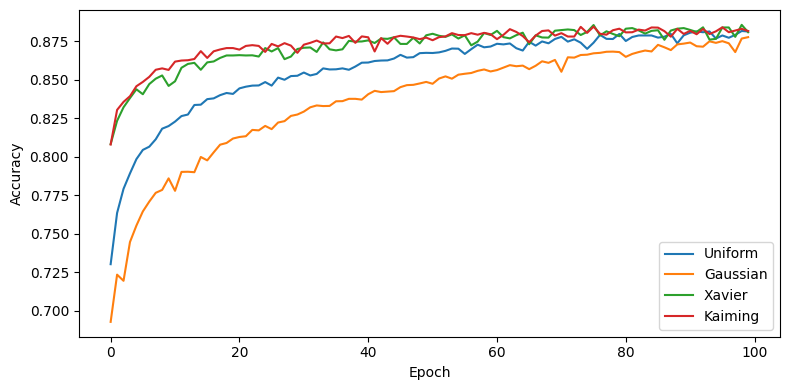

In [13]:
histories = pickle.load(open('out/exp1/histories.pickle', 'rb'))
final_accuracies = pickle.load(open('out/exp1/final_accuracies.pickle', 'rb'))
titles = ['Zeros', 'Uniform', 'Gaussian', 'Xavier', 'Kaiming']

print('Final accuracies:')
for i, acc in enumerate(final_accuracies):
    print('Model {}: {}'.format(i+1, acc))

# plots
#compare_training_histories(histories, titles, show=True)
#plot_training_history(histories[4], title=titles[4], show=True)
compare_accuracies(histories[1:], titles[1:], figsize=(8,4), plot_train=False, show=True)

# Experiment 2: Hidden Layers
Create three different models: 
1. an MLP with no hidden layers, i.e., it directly maps the inputs to outputs,
2. an MLP with a single hidden layer having 128 units and ReLU activations,
3. an MLP with 2 hidden layers each having 128 units with ReLU activations. 

It should be noted that since we want to perform classification, all of these models should have a softmax layer at the end. After training, compare the test accuracy of these three models on the Fashion MNIST dataset. Comment on how non-linearity and network depth affects the accuracy. Are the results that you obtain expected?


In [4]:
# TODO

# Experiment 3: Activation Function

Take the last model above, the one with 2 hidden layers, and create two different copies of it in which you pick two activations of your choice (except ReLU) from the course slides. After training these two models on Fashion MNIST compare their test accuracies with the model with ReLU activations. Comment on the performances of these models: which one is better and why? Are certain activations better than others? If the results are not as you expected, what could be the reason?

In [5]:
# TODO

# Experiment 4: Regularization
Create an MLP with 2 hidden layers each having 128 units with ReLU activations as above. However, this time, independently add L1 and L2 regularization to the network and train the MLP in this way. How do these regularizations affect the accuracy? (This proportion can be varied as a tunable hyperparameter that can be explored as part of other project requirements)

In [6]:
# TODO

# Experiment 5: Data Normalization
Create an MLP with 2 hidden layers each having 128 units with ReLU activations as above. However, this time, train it with unnormalized images. How does this affect the accuracy?

In [7]:
# TODO

# Experiment 6: Convolutional Neural Networks
Using PyTorch, create a convolutional neural network (CNN) with 2 convolutional and 2 fully connected layers. Although you are free in your choice of the hyperparameters of the convolutional layers, set the number of units in the fully connected layers to be 128. Also, set the activations in all of the layers to be ReLU. Train this CNN on the Fashion MNIST dataset. Does using a CNN increase/decrease the accuracy compared to using MLPs? Provide comments on your results.


In [8]:
# TODO

# Experiment 7: CIFAR-10
ow using the CIFAR-10 dataset, train an MLP using your implementation (with whatever layer dimensions you like), and a CNN with the same architecture restrictions as in (6). How does using a CNN increase/decrease the accuracy compared to using MLPs on this dataset?


In [9]:
# TODO

# Experiment 8: Optimizer
In your CNN implemented with PyTorch, investigate the effects of optimizer on performance on the CIFAR- 10 dataset. Using an SGD optimizer, set the momentum factor to zero, and then try to increase it. How does changing this value impact the training and performance of the network in terms of convergence speed, final accuracy, and stability? How do these compare if you instead use an Adam optimizer?

In [10]:
# TODO

# Experiment 9: Pre-trained Model
(BONUS: Counts for open-ended marks) Load a pre-trained model that you see fit (e.g., a ResNet) using Py- Torch, and then freeze all the convolutional layers and remove all the fully connected ones. Add a number of fully connected layers of your choice right after the convolutional layers. Train only the fully connected layers of the pre-trained model on the CIFAR-10 dataset. How does this pre-trained model compare to the best MLP in part 1 and to the regular CNN in part 5 in terms of the accuracy? How does it compare to the previous models in terms of the required training time? Justify your choice of how many fully connected layers that you have added to the pre-trained model through careful experiments.

In [11]:
# TODO